In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score
import nltk
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('tweet_product_company.csv')

In [3]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [5]:
#rename columns
df2 = df.rename(columns = {'is_there_an_emotion_directed_at_a_brand_or_product': 'Sentiment',
                           'tweet_text':'Twitter_Post', 'emotion_in_tweet_is_directed_at':'Twitter_Post_focus'})

In [6]:
df2.isnull().sum()

Twitter_Post             1
Twitter_Post_focus    5802
Sentiment                0
dtype: int64

In [7]:
#FILL Missing values
df2['Twitter_Post_focus'] = df2['Twitter_Post_focus'].fillna("")
df2['Twitter_Post'] = df2['Twitter_Post'].fillna("")

In [8]:
#verification of missing null values is removed
df2.isnull().sum()

Twitter_Post          0
Twitter_Post_focus    0
Sentiment             0
dtype: int64

In [9]:
df2.head()

,Twitter_Post,Twitter_Post_focus,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


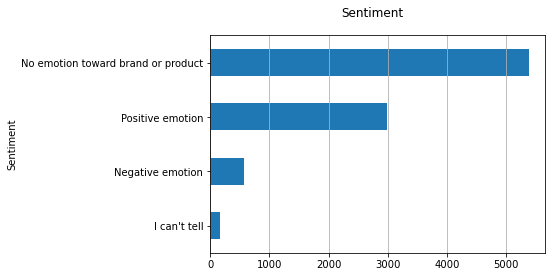

In [10]:
#Univariate Distribution of tweet_emotion_sentiment

fig, ax = plt.subplots()
fig.suptitle("Sentiment", fontsize=12)
df2["Sentiment"].reset_index().groupby("Sentiment").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

### PreProcessing the dataset

In [11]:
#Removing quotation marks, special characters, and numbers
df2['Clean_Twitter_Post01'] = df2['Twitter_Post'].str.replace("[^a-zA-Z]", " ")

In [12]:
# remove short words, less than 3 letters long
df2['Clean_Twitter_Post02'] = df2['Clean_Twitter_Post01'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))


In [13]:
df2[['Twitter_Post','Clean_Twitter_Post02']].head(15)

,Twitter_Post,Clean_Twitter_Post02
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,wesley have iPhone After tweeting RISE Austin ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,jessedee Know about fludapp Awesome iPad iPhon...
2,@swonderlin Can not wait for #iPad 2 also. The...,swonderlin wait iPad also They should sale the...
3,@sxsw I hope this year's festival isn't as cra...,sxsw hope this year festival crashy this year ...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,sxtxstate great stuff SXSW Marissa Mayer Googl...
5,@teachntech00 New iPad Apps For #SpeechTherapy...,teachntech iPad Apps SpeechTherapy Communicati...
6,,
7,"#SXSW is just starting, #CTIA is around the co...",SXSW just starting CTIA around corner googleio...
8,Beautifully smart and simple idea RT @madebyma...,Beautifully smart simple idea madebymany thene...
9,Counting down the days to #sxsw plus strong Ca...,Counting down days sxsw plus strong Canadian d...


In [14]:
#removing handles
def remove_usernames(post):
    post = re.sub('@[^\s]+','',post)
    return post
df2['Clean_Twitter_Post'] = df2['Clean_Twitter_Post01'].apply(remove_usernames)

In [15]:
df2[['Twitter_Post','Clean_Twitter_Post']].head(15)

,Twitter_Post,Clean_Twitter_Post
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,wesley I have a G iPhone After hrs twe...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,jessedee Know about fludapp Awesome iPad i...
2,@swonderlin Can not wait for #iPad 2 also. The...,swonderlin Can not wait for iPad also The...
3,@sxsw I hope this year's festival isn't as cra...,sxsw I hope this year s festival isn t as cra...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,sxtxstate great stuff on Fri SXSW Marissa M...
5,@teachntech00 New iPad Apps For #SpeechTherapy...,teachntech New iPad Apps For SpeechTherapy...
6,,
7,"#SXSW is just starting, #CTIA is around the co...",SXSW is just starting CTIA is around the co...
8,Beautifully smart and simple idea RT @madebyma...,Beautifully smart and simple idea RT madebyma...
9,Counting down the days to #sxsw plus strong Ca...,Counting down the days to sxsw plus strong Ca...


In [16]:
#Applying Stop words
from nltk.corpus import stopwords
import string


stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)

df2['Clean_Twitter_Post2'] = df2['Clean_Twitter_Post'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_list)]))

In [17]:
df2[['Clean_Twitter_Post','Clean_Twitter_Post2']].head(15)

,Clean_Twitter_Post,Clean_Twitter_Post2
0,wesley I have a G iPhone After hrs twe...,wesley I G iPhone After hrs tweeting RISE Aust...
1,jessedee Know about fludapp Awesome iPad i...,jessedee Know fludapp Awesome iPad iPhone app ...
2,swonderlin Can not wait for iPad also The...,swonderlin Can wait iPad also They sale SXSW
3,sxsw I hope this year s festival isn t as cra...,sxsw I hope year festival crashy year iPhone a...
4,sxtxstate great stuff on Fri SXSW Marissa M...,sxtxstate great stuff Fri SXSW Marissa Mayer G...
5,teachntech New iPad Apps For SpeechTherapy...,teachntech New iPad Apps For SpeechTherapy And...
6,,
7,SXSW is just starting CTIA is around the co...,SXSW starting CTIA around corner googleio hop ...
8,Beautifully smart and simple idea RT madebyma...,Beautifully smart simple idea RT madebymany th...
9,Counting down the days to sxsw plus strong Ca...,Counting days sxsw plus strong Canadian dollar...


In [18]:
#removing special characters, numbers, punctuations
df2['Clean_Twitter_Post3'] = df2['Clean_Twitter_Post2'].str.replace("[^a-zA-Z#]", " ")

In [19]:
df2[['Clean_Twitter_Post2','Clean_Twitter_Post3']].head(15)

,Clean_Twitter_Post2,Clean_Twitter_Post3
0,wesley I G iPhone After hrs tweeting RISE Aust...,wesley I G iPhone After hrs tweeting RISE Aust...
1,jessedee Know fludapp Awesome iPad iPhone app ...,jessedee Know fludapp Awesome iPad iPhone app ...
2,swonderlin Can wait iPad also They sale SXSW,swonderlin Can wait iPad also They sale SXSW
3,sxsw I hope year festival crashy year iPhone a...,sxsw I hope year festival crashy year iPhone a...
4,sxtxstate great stuff Fri SXSW Marissa Mayer G...,sxtxstate great stuff Fri SXSW Marissa Mayer G...
5,teachntech New iPad Apps For SpeechTherapy And...,teachntech New iPad Apps For SpeechTherapy And...
6,,
7,SXSW starting CTIA around corner googleio hop ...,SXSW starting CTIA around corner googleio hop ...
8,Beautifully smart simple idea RT madebymany th...,Beautifully smart simple idea RT madebymany th...
9,Counting days sxsw plus strong Canadian dollar...,Counting days sxsw plus strong Canadian dollar...


In [20]:
drop = ['Twitter_Post','Clean_Twitter_Post', 'Clean_Twitter_Post2','Clean_Twitter_Post01','Clean_Twitter_Post02' ]
df3 = df2.drop(drop, axis = 1)

In [21]:
df3.head(5)

,Twitter_Post_focus,Sentiment,Clean_Twitter_Post3
0,iPhone,Negative emotion,wesley I G iPhone After hrs tweeting RISE Aust...
1,iPad or iPhone App,Positive emotion,jessedee Know fludapp Awesome iPad iPhone app ...
2,iPad,Positive emotion,swonderlin Can wait iPad also They sale SXSW
3,iPad or iPhone App,Negative emotion,sxsw I hope year festival crashy year iPhone a...
4,Google,Positive emotion,sxtxstate great stuff Fri SXSW Marissa Mayer G...


In [22]:
#Applying Stemming
stemmer = nltk.SnowballStemmer("english")

def stem (text):
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [23]:
df3['Stem_Post'] = df3['Clean_Twitter_Post3'].apply(stem)

In [24]:
#Applying Lemmatization

lemmatizer = WordNetLemmatizer()

def lemmatization(text):
    text = [lemmatizer.lemmatize(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [25]:
df3['lem_post'] = df3['Stem_Post'].apply(lemmatization)

In [26]:
#Applying lower case - Post Lemmatization
#DO NOT DELETE

#def lowercase (text):
    #text = [word.lower() for word in text.split(' ')]
    #text = " ".join(text)
    #return text


#df3['PreFinal_Post'] = df3['lem_post'].apply(lowercase)

In [27]:
#Applying lower case - Post Lemmatization
#SAMPLE TO FIX LOWERCASE PROBLEM

def lowercase (text):
    text = [word.lower() for word in text.split(' ')]
    text = " ".join(text)
    return text


df3['Final_Post'] = df3['lem_post'].apply(lowercase)

In [29]:
#We will use this df for KERAS tokenization for RNN
#cols = ['Twitter_Post_focus', 'Sentiment', 'PreFinal_Post' ]
#df01 = df3[cols]
#dfK = df01.rename(columns = {'PreFinal_Post':'Final_Post'})
#dfK.head(1)

In [30]:
#Applying Tokenization 
#DO NOT DELETE


#from nltk.tokenize import word_tokenize

#df3['Final_Post'] = df3['PreFinal_Post'].apply(word_tokenize)

In [31]:
df3[['Clean_Twitter_Post3','Final_Post']].head(15)

,Clean_Twitter_Post3,Final_Post
0,wesley I G iPhone After hrs tweeting RISE Aust...,wesley i g iphon after hr tweet rise austin de...
1,jessedee Know fludapp Awesome iPad iPhone app ...,jessede know fludapp awesom ipad iphon app lik...
2,swonderlin Can wait iPad also They sale SXSW,swonderlin can wait ipad also they sale sxsw
3,sxsw I hope year festival crashy year iPhone a...,sxsw i hope year festiv crashi year iphon app ...
4,sxtxstate great stuff Fri SXSW Marissa Mayer G...,sxtxstate great stuff fri sxsw marissa mayer g...
5,teachntech New iPad Apps For SpeechTherapy And...,teachntech new ipad app for speechtherapi and ...
6,,
7,SXSW starting CTIA around corner googleio hop ...,sxsw start ctia around corner googleio hop ski...
8,Beautifully smart simple idea RT madebymany th...,beauti smart simpl idea rt madebymani thenextw...
9,Counting days sxsw plus strong Canadian dollar...,count day sxsw plus strong canadian dollar mea...


In [32]:
#generating different dataframes's by sentiment for wordcloud

dfNaN = df3.loc[df3.Sentiment== 'No emotion toward brand or product']
df_pve= df3.loc[df3.Sentiment== 'Positive emotion']
df_nve = df3.loc[df3.Sentiment== 'Negative emotion']


In [33]:
nan = dfNaN['Final_Post']
pve = df_pve['Final_Post']
nve = df_nve['Final_Post']

all_words = df3['Final_Post']

#list comprehension
#Use map() method for mapping str (for converting elements in list to string) with given iterator, the list. 
nanl = ' '.join(map(str, nan))
pvel = ' '.join(map(str, pve))
nvel = ' '.join(map(str, nve))
allw = ' '.join(map(str, all_words))

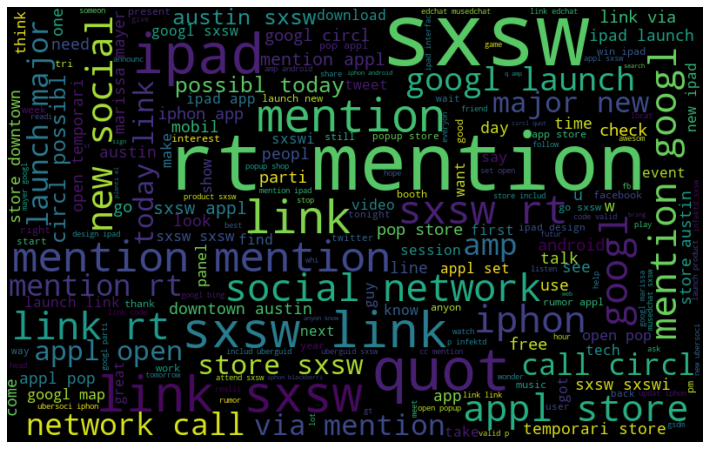

In [34]:
#wordcloud for neutral words
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(nanl)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

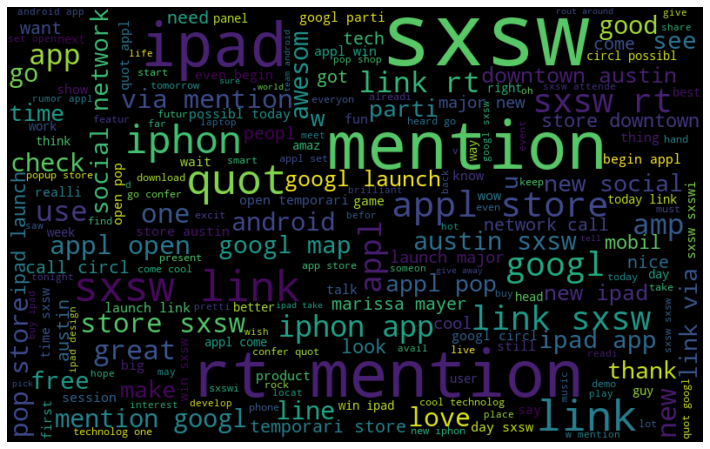

In [35]:
#wordcloud for Positive words
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(pvel)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

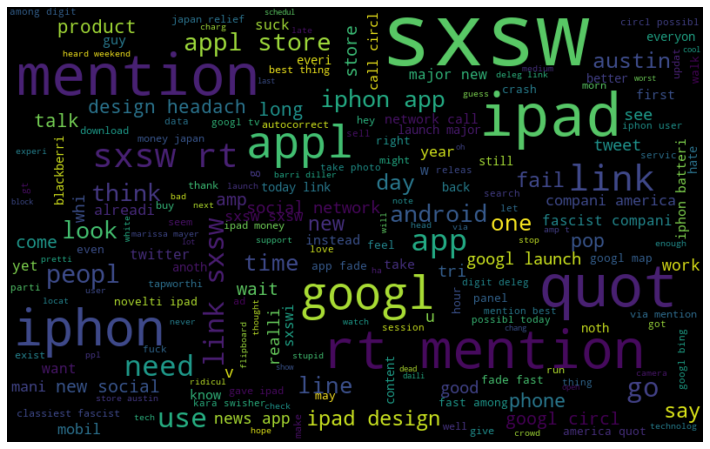

In [36]:
#wordcloud for Negative words
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(nvel)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

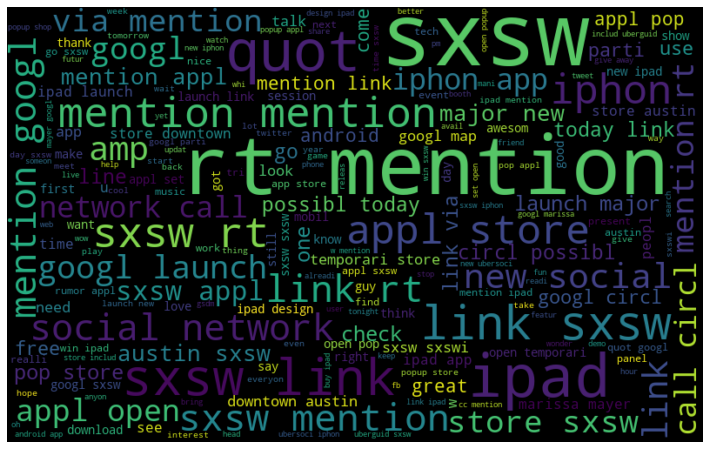

In [37]:
#wordcloud for all sentiments
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(allw)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
y = np.array(df3['Sentiment'])
X = np.array(df3['Final_Post'])


print("y shape", y.shape)
print("x shape", X.shape)


y shape (9093,)
x shape (9093,)



### Model Training - COUNT VECTORIZER

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1000, stop_words='english')

y = df3['Sentiment']
X = df3['Final_Post']

CVX = cv.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(CVX, y, random_state=42, test_size=0.15)

In [43]:
from sklearn.model_selection import train_test_split

model = LogisticRegression()
model.fit(x_train, y_train)

#Predictions on test set
cv_predictions = model.predict(x_test)
print (classification_report(y_test, cv_predictions))

print("Accuracy Score: ", accuracy_score(y_test,cv_predictions))

                                    precision    recall  f1-score   support

                      I can't tell       0.00      0.00      0.00        28
                  Negative emotion       0.41      0.25      0.31        81
No emotion toward brand or product       0.70      0.82      0.75       803
                  Positive emotion       0.60      0.49      0.54       452

                          accuracy                           0.66      1364
                         macro avg       0.43      0.39      0.40      1364
                      weighted avg       0.63      0.66      0.64      1364

Accuracy Score:  0.6590909090909091


### Model training TFIDF VECTORIZER

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfdf = TfidfVectorizer(ngram_range=(1,2), max_features=500000)

y = df3['Sentiment']
X = df3['Final_Post']

TFX = tfdf.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(TFX, y, random_state=42, test_size=0.05)

In [45]:
model = LogisticRegression()
model.fit(x_train, y_train)

#Predictions on test set
tfidf_predictions = model.predict(x_test)
print (classification_report(y_test, tfidf_predictions))

print("Accuracy Score", accuracy_score(y_test,tfidf_predictions))

                                    precision    recall  f1-score   support

                      I can't tell       0.00      0.00      0.00        11
                  Negative emotion       0.60      0.14      0.23        21
No emotion toward brand or product       0.70      0.90      0.79       273
                  Positive emotion       0.70      0.46      0.56       150

                          accuracy                           0.70       455
                         macro avg       0.50      0.38      0.39       455
                      weighted avg       0.68      0.70      0.67       455

Accuracy Score 0.701098901098901


### RECURRENT NEURAL NETWORKS (RNN)

In [43]:
dfK.head(5)

,Twitter_Post_focus,Sentiment,Final_Post
0,iPhone,Negative emotion,wesley i g iphon after hr tweet rise austin de...
1,iPad or iPhone App,Positive emotion,jessede know fludapp awesom ipad iphon app lik...
2,iPad,Positive emotion,swonderlin can wait ipad also they sale sxsw
3,iPad or iPhone App,Negative emotion,sxsw i hope year festiv crashi year iphon app ...
4,Google,Positive emotion,sxtxstate great stuff fri sxsw marissa mayer g...


In [46]:
train_data, test_data = train_test_split(df3, test_size=0.20,
                                         random_state=7)

In [47]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.Final_Post)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

2022-10-22 11:43:12.289253: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Vocabulary Size : 6528


In [48]:
from keras.preprocessing import sequence
from keras.utils import pad_sequences

MAX_WORDS = 30
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.Final_Post), maxlen = MAX_WORDS)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.Final_Post), maxlen = MAX_WORDS)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (7274, 30)
Testing X Shape: (1819, 30)


In [62]:
encoder = LabelEncoder()
encoder.fit(train_data.Sentiment)

#y_train = encoder.transform(train_data.Sentiment.to_list())
y_train = encoder.transform(train_data.Sentiment)
#y_test = encoder.transform(test_data.Sentiment.to_list())
y_test = encoder.transform(test_data.Sentiment)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (7274, 1)
y_test shape: (1819, 1)


In [94]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense

embedding_size=32
vocabulary_size = 5000

#model=Sequential()
#model.add(Embedding(vocabulary_size, embedding_size, input_length=MAX_WORDS))
#model.add(LSTM(8))
#model.add(Dense(4, activation='softmax'))
#print(model.summary())


model = Sequential()
model.add(Embedding(10000, 128))
#model.add(LSTM(128, dropout=0.2))
model.add(LSTM(128, dropout=0.4))
model.add(Dense(4, activation='softmax'))
print(model.summary())
 


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 128)         1280000   
                                                                 
 lstm_6 (LSTM)               (None, 128)               131584    
                                                                 
 dense_47 (Dense)            (None, 4)                 516       
                                                                 
Total params: 1,412,100
Trainable params: 1,412,100
Non-trainable params: 0
_________________________________________________________________
None


In [95]:
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [98]:
history = model.fit(x_train, y_train, epochs = 15, validation_data=(x_test, y_test))


Epoch 1/15
228/228 [==============================] - 8s 36ms/step - loss: 0.1516 - accuracy: 0.9344 - val_loss: 1.5817 - val_accuracy: 0.6526
Epoch 2/15
228/228 [==============================] - 9s 40ms/step - loss: 0.1471 - accuracy: 0.9357 - val_loss: 1.5705 - val_accuracy: 0.6531
Epoch 3/15
228/228 [==============================] - 10s 45ms/step - loss: 0.1397 - accuracy: 0.9402 - val_loss: 2.0739 - val_accuracy: 0.6289
Epoch 4/15
228/228 [==============================] - 12s 51ms/step - loss: 0.1381 - accuracy: 0.9417 - val_loss: 1.8413 - val_accuracy: 0.6416
Epoch 5/15
228/228 [==============================] - 13s 59ms/step - loss: 0.1281 - accuracy: 0.9453 - val_loss: 1.6438 - val_accuracy: 0.6482
Epoch 6/15
228/228 [==============================] - 14s 63ms/step - loss: 0.1262 - accuracy: 0.9451 - val_loss: 1.6612 - val_accuracy: 0.6537
Epoch 7/15
228/228 [==============================] - 15s 65ms/step - loss: 0.1241 - accuracy: 0.9467 - val_loss: 1.8583 - val_accuracy: 0

In [92]:
acc_test = model.evaluate(x_test, y_test, verbose = 0)[1]
acc_train = model.evaluate(x_train, y_train, verbose = 0)[1]

print('acc test', acc_test)
print('acc train', acc_train)

acc test 0.6525563597679138
acc train 0.9546329379081726


<bound method Axes.plot of <AxesSubplot:title={'center':'model accuracy'}, xlabel='epoch', ylabel='accuracy'>>

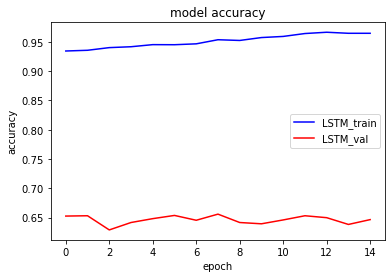

In [110]:
s, (at) = plt.subplots(1,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'])
at.plot


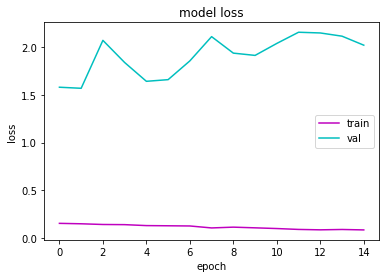

In [111]:
s, (al) = plt.subplots(1,1)
al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'])